# Logistic Regression

## 📌 What is Logistic Regression?

Logistic Regression is used to model the relationship between a **binary outcome variable** $y$ (0 or 1) and one or more predictor variables ($x_1, x_2, ..., x_p$).

- Unlike linear regression, it predicts **probabilities** that $y = 1$.
- The model uses the **logit function**:

$$
\text{logit}(p) = \log \frac{p}{1-p} = \beta_0 + \beta_1 x_1 + \dots + \beta_p x_p
$$

Where:  
- $p = P(y=1 \mid x_1, ..., x_p)$  
- $\beta_0$ = intercept  
- $\beta_j$ = coefficient for predictor $x_j$


## 📌 From Logit to Probability

We convert logit to probability using the **logistic function**:

$$
p = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + ... + \beta_p x_p)}}
$$

- $\beta_j > 0$ → predictor increases probability of $y=1$  
- $\beta_j < 0$ → predictor decreases probability of $y=1$  
- $\beta_j = 0$ → no effect


## 📌 Hypothesis Testing in Logistic Regression

- Null hypothesis $H_0$: $\beta_j = 0$ (predictor has no effect)  
- Alternative $H_a$: $\beta_j \neq 0$ (predictor affects outcome)

Coefficients are estimated via **Maximum Likelihood Estimation (MLE)** rather than OLS.


In [1]:
# Example: Predict pass/fail based on study hours
study_hours <- c(2, 3, 4, 5, 6, 7, 8, 9, 10)
pass_exam <- c(0, 0, 0, 0, 1, 1, 1, 1, 1)  # 0=Fail, 1=Pass

# Combine into data frame
logit_data <- data.frame(Study = study_hours, Pass = pass_exam)

# Fit logistic regression model
logit_model <- glm(Pass ~ Study, data = logit_data, family = binomial)

# Print model summary
summary(logit_model)

# Predicted probabilities
logit_data$Predicted_Prob <- predict(logit_model, type = "response")
print("Predicted Probabilities:")
print(logit_data$Predicted_Prob)

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = Pass ~ Study, family = binomial, data = logit_data)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept)   -248.42  380171.05  -0.001    0.999
Study           45.16   68704.80   0.001    0.999

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1.2365e+01  on 8  degrees of freedom
Residual deviance: 6.2376e-10  on 7  degrees of freedom
AIC: 4

Number of Fisher Scoring iterations: 25


[1] "Predicted Probabilities:"
[1] 2.220446e-16 2.220446e-16 2.220446e-16 1.525811e-10 1.000000e+00
[6] 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00


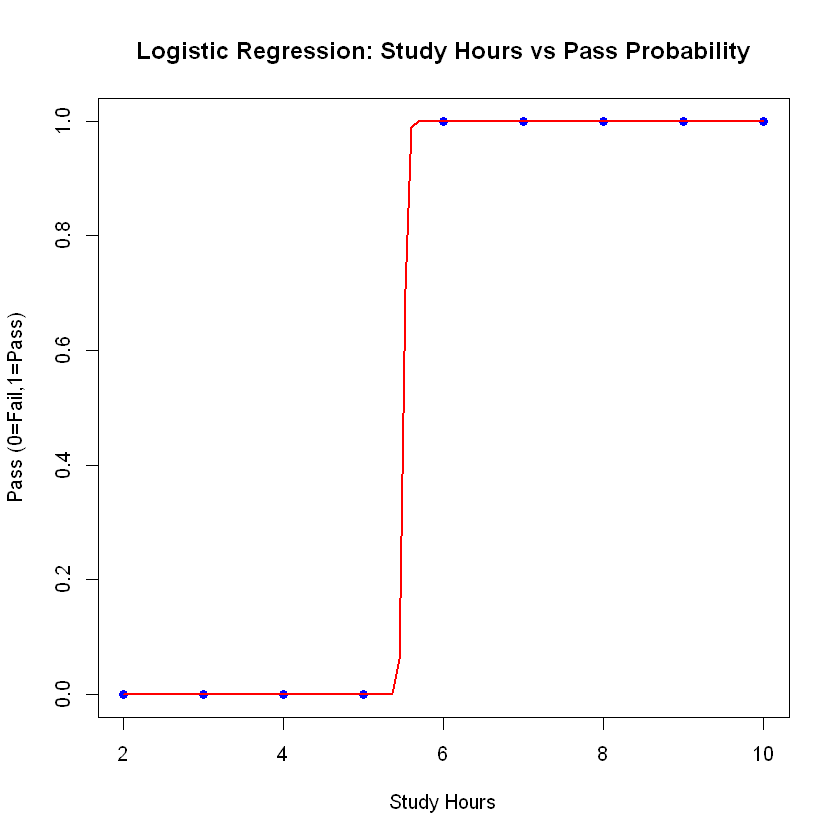

In [3]:
# Plot observed and predicted probabilities
par(bg = "white", col.axis = "black", col.lab = "black", col.main = "black", pch = 19)
plot(logit_data$Study, logit_data$Pass, pch = 19, col = "blue",
     xlab = "Study Hours", ylab = "Pass (0=Fail,1=Pass)",
     main = "Logistic Regression: Study Hours vs Pass Probability")

# Add logistic curve
curve(predict(logit_model, newdata = data.frame(Study = x), type="response"),
      add = TRUE, col = "red", lwd = 2)

## 📌 Interpretation

- The logistic curve shows **probability of passing** for different study hours.  
- As study hours increase, the probability of passing increases.  
- Coefficient $\hat{\beta}_\text{Study}$ > 0 indicates **more study hours → higher pass probability**.


# Real-World Analogy

Imagine predicting whether a student passes an exam based on study hours:

- Points on the plot: each student’s result (pass=1, fail=0)  
- Red curve: predicted probability of passing  
- Helps teachers or students **understand the likelihood of success** given study effort.  
- Similar to **medical studies**, e.g., predicting presence/absence of a disease based on risk factors.
